## Facial Expression Recognizer using Fully Convolutional Network

### Imports

In [1]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from PIL import Image
from FacialExpressionsRecognizer import FacialExpressionsRecognizer


### Construct FacialExpressionsRecognizer

In [2]:
# constructing FacialExpressionsRecognizer 
fer = FacialExpressionsRecognizer(
    image_width=66, image_height=88, 
    train_folder="dataset/train",
    validation_folder="dataset/valid"
)
fer.load("fcn-facial-expressions.pt")

classes=  ['anger', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


### To train and save model, you may skip this for demo

In [ ]:
# training and save
fer.train(120, 64, opt="Adam", sched="OnceCycleLR", seed=94)
#fer.save("model.pt")

### To load evaluate model given a directory same structure as dataset

100%|██████████| 74/74 [00:15<00:00,  4.65it/s]


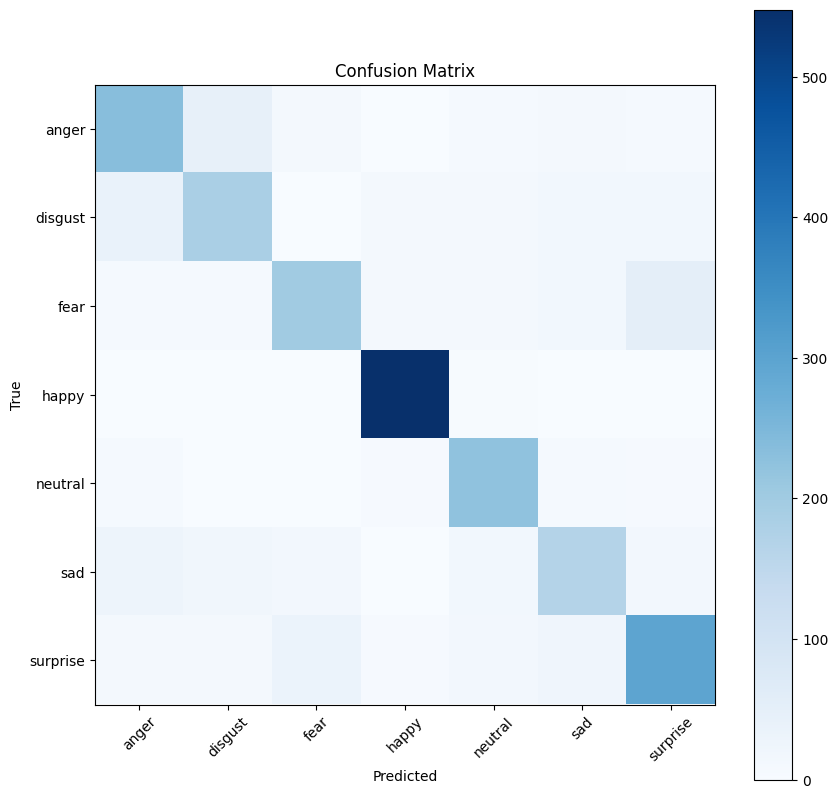

Accuracy: 0.7899, Precision: 0.7871, Recall: 0.7899, F1: 0.7873


In [3]:
# evaluating model
fer.load("fcn-facial-expressions.pt")
fer.evaluate("dataset/valid/")

### Testing recognition on individual face images

Input1: neutral  =>  Recognized: neutral

Input2: fear  =>  Recognized: fear

Input3: sad  =>  Recognized: sad

Input4: happy  =>  Recognized: happy

Input5: disgust  =>  Recognized: disgust

Input6: anger  =>  Recognized: anger

Input7: surprise  =>  Recognized: surprise



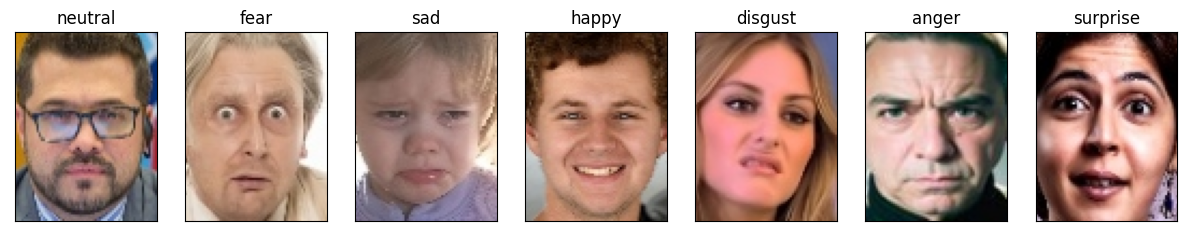

In [4]:
images = list()
classes = list()

img = Image.open("./demo/faces/neutral2.jpg")
images.append(img)
classes.append(fer.recognize(img))
print("Input1: neutral  =>  Recognized:", classes[-1])
print()

img = Image.open("./demo/faces/fear2.jpg")
images.append(img)
classes.append(fer.recognize(img))
print("Input2: fear  =>  Recognized:", classes[-1])

print()

img = Image.open("./demo/faces/sad.jpg")
images.append(img)
classes.append(fer.recognize(img))
print("Input3: sad  =>  Recognized:", classes[-1])

print()

img = Image.open("./demo/faces/happy.jpg")
images.append(img)
classes.append(fer.recognize(img))
print("Input4: happy  =>  Recognized:", classes[-1])

print()

img = Image.open("./demo/faces/disgust.jpg")
images.append(img)
classes.append(fer.recognize(img))
print("Input5: disgust  =>  Recognized:", classes[-1])

print()

img = Image.open("./demo/faces/anger.jpg")
images.append(img)
classes.append(fer.recognize(img))
print("Input6: anger  =>  Recognized:", classes[-1])

print()

img = Image.open("./demo/faces/surprise.jpg")
images.append(img)
classes.append(fer.recognize(img))
print("Input7: surprise  =>  Recognized:", classes[-1])

print()

# visualizaing the images
fig, axes = plt.subplots(1, 7, figsize=(15, 8),subplot_kw={'xticks': (), 'yticks': ()})
for label, image, ax in zip(classes, images, axes.ravel()): 
    ax.imshow(image, cmap=cm.gray) 
    ax.set_title(label) 

### To detect multiple faces and recognize their facial expressions on an image

In [6]:
import cv2
from PIL import Image
from facenet_pytorch import MTCNN
import matplotlib.pyplot as plt

def detect_faces_expressions(fe:FacialExpressionsRecognizer, image_path:str):
    # Load the pre-trained face detection model
    mtcnn = MTCNN(min_face_size=50)

    # Read the input image
    image = cv2.imread(image_path)

    # Detect faces in the image
    boxes, _ = mtcnn.detect(img=image, landmarks=False)

    # Draw the text "emotion: happy" on each face detected and crop the face
    if boxes is None:
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.show()
        return

    for box in boxes:
        x1, y1, x2, y2 = box.astype('int')
        padding_top = int(0.2 * (y2 - y1))
        padding_bottom = int(0.05 * (y2 - y1))
        y1 = max(0, y1 - padding_top)
        y2 += padding_bottom

        # Crop the face
        face = image[y1:y2, x1:x2]

        # Classify the emotion using the embedding
        emotion = "?"
        emotion = fe.recognize(Image.fromarray(face))

        cv2.putText(image, f"{emotion}", (x1, y2+50), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (204, 25, 0), 2)
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

    # Display the resulting image
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.show()

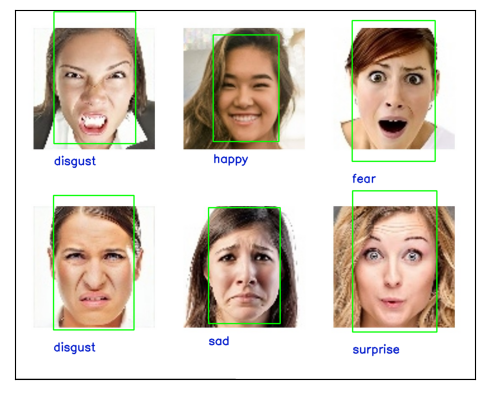

In [7]:
detect_faces_expressions(fer, "demo/group_faces.jpg")

### To detect multiple faces and recognize their facial expressions using webcam

In [8]:
import cv2
from PIL import Image
from facenet_pytorch import MTCNN


def detect_faces_expressions_webcam(fe:FacialExpressionsRecognizer, device:int=0):
    # Load the pre-trained face detection model
    mtcnn = MTCNN(min_face_size=50)

    # Open the default camera
    cap = cv2.VideoCapture(device)

    while True:
        # Capture frame-by-frame
        ret, frame = cap.read()

        if ret == False:
            cap = cv2.VideoCapture(device)
            continue

        # Detect faces in the frame
        boxes, _ = mtcnn.detect(img=frame, landmarks=False)

        # Draw the text "emotion: happy" on each face detected and crop the face
        if boxes is None:
            cv2.imshow('camera frame', frame)
            continue

        for box in boxes:
            x1, y1, x2, y2 = box.astype('int')
            padding_top = int(0.2 * (y2 - y1))
            padding_bottom = int(0.05 * (y2 - y1))
            y1 = max(0, y1 - padding_top)
            y2 += padding_bottom

            # Crop the face
            face = frame[y1:y2, x1:x2]

            # Classify the emotion using the embedding
            emotion = "?"
            cv2.imshow('face', face)
            emotion = fe.recognize(Image.fromarray(face))

            cv2.putText(frame, f"{emotion}", (x1, y2+50), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 250, 0), 2)
            cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)

        # Display the resulting frame
        cv2.imshow('camera frame', frame)

        # Wait for 1 millisecond for user to press 'q' key to exit
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    # Release the capture
    if cap is not None:
        cap.release()
    cv2.destroyAllWindows()

    


In [9]:
# if you have multiple webcams,
# you need to set the approirate device number
detect_faces_expressions_webcam(fer, 0)